In [1]:
!pip install anndata

In [2]:
!pip install scanpy

In [3]:
import scanpy as sc
import anndata
import importlib
from sklearn.decomposition import PCA

import matplotlib as mpl

In [5]:
import h5py
import anndata

# Read the data into an AnnData object
adata = anndata.read_h5ad('C:/Users/smattaparthi/CS-297/TabulaSapiens_Heart_Dataset.h5ad')

print(adata) 

AnnData object with n_obs × n_vars = 11505 × 58604
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'de

In [6]:
#shape of data matrix
print(adata.shape)

(11505, 58604)


In [7]:
# Get the dimensions of the data 
print("Number of Cells:", adata.n_obs)
print("Number of Genes:", adata.n_vars)

Number of Cells: 11505
Number of Genes: 58604


In [8]:
#view variable names(genes)
print(adata.var_names)

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)


In [9]:
#view observation names(cell)
print(adata.obs_names)

Index(['AAACCCAAGAGCAAGA_TSP12_Heart_Atria_10X_1_1',
       'AAACCCAAGATGGCGT_TSP12_Heart_Atria_10X_1_1',
       'AAACCCAAGGGTTAAT_TSP12_Heart_Atria_10X_1_1',
       'AAACCCAAGTATGCAA_TSP12_Heart_Atria_10X_1_1',
       'AAACCCAAGTCGTTAC_TSP12_Heart_Atria_10X_1_1',
       'AAACCCAAGTTGGAGC_TSP12_Heart_Atria_10X_1_1',
       'AAACCCACAAGATTGA_TSP12_Heart_Atria_10X_1_1',
       'AAACCCACAGTGACCC_TSP12_Heart_Atria_10X_1_1',
       'AAACCCAGTAAGCTCT_TSP12_Heart_Atria_10X_1_1',
       'AAACCCAGTCAGGTGA_TSP12_Heart_Atria_10X_1_1',
       ...
       'TSP12_Heart_ventricle_SS2_B133716_B134037_LIve_O11_L004',
       'TSP12_Heart_ventricle_SS2_B133716_B134037_LIve_O12_L004',
       'TSP12_Heart_ventricle_SS2_B133716_B134037_LIve_O2_L004',
       'TSP12_Heart_ventricle_SS2_B133716_B134037_LIve_O3_L004',
       'TSP12_Heart_ventricle_SS2_B133716_B134037_LIve_O4_L004',
       'TSP12_Heart_ventricle_SS2_B133716_B134037_LIve_O5_L004',
       'TSP12_Heart_ventricle_SS2_B133716_B134037_LIve_O6_L004',
  

In [10]:
#view first few rows of data
print("First 5 rows:\n", adata.X[:5])

First 5 rows:
   (0, 38)	2.763622
  (0, 84)	5.8476806
  (0, 89)	4.0978265
  (0, 103)	3.4415958
  (0, 114)	5.109667
  (0, 118)	7.3447404
  (0, 229)	2.2818959
  (0, 256)	2.880652
  (0, 273)	2.0861118
  (0, 297)	1.689252
  (0, 339)	5.793442
  (0, 366)	4.0624876
  (0, 398)	0.0
  (0, 423)	3.211891
  (0, 575)	6.3940516
  (0, 582)	3.1601813
  (0, 615)	4.5084615
  (0, 690)	2.6280882
  (0, 729)	3.3469772
  (0, 747)	2.4396396
  (0, 751)	2.1505191
  (0, 783)	2.1812332
  (0, 785)	2.7655473
  (0, 805)	3.2527475
  (0, 808)	4.4103656
  :	:
  (4, 58016)	2.1928084
  (4, 58019)	1.8934236
  (4, 58021)	1.6928729
  (4, 58024)	0.0
  (4, 58054)	0.0
  (4, 58058)	1.2653376
  (4, 58107)	0.0
  (4, 58231)	2.1992369
  (4, 58236)	0.99833167
  (4, 58358)	1.4362142
  (4, 58568)	3.1817544
  (4, 58570)	3.8466578
  (4, 58572)	2.3985949
  (4, 58576)	2.7125764
  (4, 58582)	4.3128786
  (4, 58585)	5.1038
  (4, 58587)	0.62404966
  (4, 58588)	4.0083833
  (4, 58589)	4.1233883
  (4, 58591)	3.6934
  (4, 58593)	1.378214
  (4, 585

In [11]:
#Preprocessing

In [13]:
#removing cells with less than 200 genes
sc.pp.filter_cells(adata, min_genes=200)

In [14]:
#removing genes with less than 3 cells
sc.pp.filter_genes(adata, min_cells=3)

In [15]:
print(adata)

AnnData object with n_obs × n_vars = 11505 × 31755
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_predi

In [16]:
# After Preprocessing dimensions of the data 
print("Number of Cells:", adata.n_obs)
print("Number of Genes:", adata.n_vars)

Number of Cells: 11505
Number of Genes: 31755


# Classification

## Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#  target variable is  'cell_type' - to be predicted
target_var = 'cell_type'

# Extract features (gene expressions) and target to X and y variables respectively
X = adata.X  # Features (gene expressions)
y = adata.obs[target_var]  # Target variable

print("Features:\n", X)
print("\n Target:\n", y)

# Spliting data into train and test sets with train_test_split, # training data: 80%, testing data: 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

#Instantiate logistic regression model
LR_Model = LogisticRegression(max_iter=1000)
#Train the model
LR_Model.fit(X_train, y_train)

# Predict test data
y_pred = LR_Model.predict(X_test)

print("\n\n Predicted target: cell_type\n\n", y_pred)



Features:
   (0, 18)	2.763622
  (0, 49)	5.8476806
  (0, 54)	4.0978265
  (0, 65)	3.4415958
  (0, 74)	5.109667
  (0, 78)	7.3447404
  (0, 155)	2.2818959
  (0, 176)	2.880652
  (0, 188)	2.0861118
  (0, 204)	1.689252
  (0, 229)	5.793442
  (0, 248)	4.0624876
  (0, 270)	0.0
  (0, 281)	3.211891
  (0, 349)	6.3940516
  (0, 354)	3.1601813
  (0, 370)	4.5084615
  (0, 411)	2.6280882
  (0, 430)	3.3469772
  (0, 442)	2.4396396
  (0, 445)	2.1505191
  (0, 468)	2.1812332
  (0, 469)	2.7655473
  (0, 481)	3.2527475
  (0, 484)	4.4103656
  :	:
  (11504, 31172)	1.4387573
  (11504, 31179)	3.574275
  (11504, 31276)	1.8052568
  (11504, 31349)	2.1834857
  (11504, 31363)	2.1223752
  (11504, 31623)	3.6090944
  (11504, 31625)	1.2932464
  (11504, 31628)	2.103108
  (11504, 31639)	7.0849237
  (11504, 31673)	0.0
  (11504, 31710)	4.218026
  (11504, 31722)	2.5984704
  (11504, 31724)	4.147538
  (11504, 31726)	3.05333
  (11504, 31730)	1.8903092
  (11504, 31736)	3.2195039
  (11504, 31739)	2.9446635
  (11504, 31741)	2.74616
  (1

In [23]:
# Model Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
CR = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", CR)

Accuracy: 0.9869621903520208
Classification Report:
                               precision    recall  f1-score   support

    cardiac endothelial cell       0.99      1.00      0.99       544
         cardiac muscle cell       0.99      0.99      0.99      1435
fibroblast of cardiac tissue       1.00      0.98      0.99        44
                  macrophage       1.00      0.36      0.53        11
                 native cell       0.95      0.94      0.95       223
          smooth muscle cell       1.00      1.00      1.00        44

                    accuracy                           0.99      2301
                   macro avg       0.99      0.88      0.91      2301
                weighted avg       0.99      0.99      0.99      2301



## Support Vector Machine (SVM) 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#  target variable is  'cell_type' - to be predicted
target_var_svm = 'cell_type'

# Extract features (gene expressions) and target to X and y variables respectively
X_svm = adata.X  # Features (gene expressions)
y_svm = adata.obs[target_var_svm]  # Target variable

print("Features:\n", X_svm)
print("\n Target:\n\n", y_svm)

# Spliting data into train and test sets with train_test_split, # training data: 80%, testing data: 20% 
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42) 

#Instantiate Support Vector Machine model
SVM_Model = SVC(kernel ='linear', C=1.0)
#Train the model
SVM_Model.fit(X_train_svm, y_train_svm)

# Predict test data
y_pred_svm = SVM_Model.predict(X_test_svm)

print("\n\n Predicted target with SVM: cell_type\n\n", y_pred_svm)

Features:
   (0, 18)	2.763622
  (0, 49)	5.8476806
  (0, 54)	4.0978265
  (0, 65)	3.4415958
  (0, 74)	5.109667
  (0, 78)	7.3447404
  (0, 155)	2.2818959
  (0, 176)	2.880652
  (0, 188)	2.0861118
  (0, 204)	1.689252
  (0, 229)	5.793442
  (0, 248)	4.0624876
  (0, 270)	0.0
  (0, 281)	3.211891
  (0, 349)	6.3940516
  (0, 354)	3.1601813
  (0, 370)	4.5084615
  (0, 411)	2.6280882
  (0, 430)	3.3469772
  (0, 442)	2.4396396
  (0, 445)	2.1505191
  (0, 468)	2.1812332
  (0, 469)	2.7655473
  (0, 481)	3.2527475
  (0, 484)	4.4103656
  :	:
  (11504, 31172)	1.4387573
  (11504, 31179)	3.574275
  (11504, 31276)	1.8052568
  (11504, 31349)	2.1834857
  (11504, 31363)	2.1223752
  (11504, 31623)	3.6090944
  (11504, 31625)	1.2932464
  (11504, 31628)	2.103108
  (11504, 31639)	7.0849237
  (11504, 31673)	0.0
  (11504, 31710)	4.218026
  (11504, 31722)	2.5984704
  (11504, 31724)	4.147538
  (11504, 31726)	3.05333
  (11504, 31730)	1.8903092
  (11504, 31736)	3.2195039
  (11504, 31739)	2.9446635
  (11504, 31741)	2.74616
  (1

In [25]:
# Model Accuracy and Classification Report to measure performance
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
CR_svm = classification_report(y_test_svm, y_pred_svm)

print("Accuracy SVM:", accuracy_svm)
print("Classification Report SVM:\n", CR_svm)

Accuracy SVM: 0.9887005649717514
Classification Report SVM:
                               precision    recall  f1-score   support

    cardiac endothelial cell       0.99      1.00      1.00       544
         cardiac muscle cell       0.99      0.99      0.99      1435
fibroblast of cardiac tissue       1.00      0.98      0.99        44
                  macrophage       1.00      0.45      0.62        11
                 native cell       0.96      0.96      0.96       223
          smooth muscle cell       1.00      1.00      1.00        44

                    accuracy                           0.99      2301
                   macro avg       0.99      0.90      0.93      2301
                weighted avg       0.99      0.99      0.99      2301



# Clustering

## K-Means  on Genes (X)

Number of Clusters: 

 6


C:\Users\smattaparthi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



 
 Cluster Labels:

 [4 4 1 ... 0 4 0]


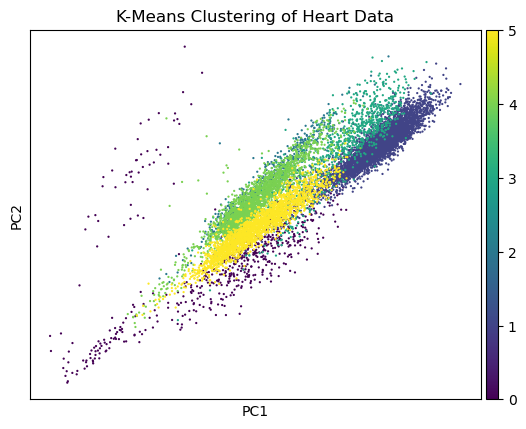

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# number of clusters - value of K
clusters_k = 6

print("Number of Clusters:",clusters_k, "\n\n")

#Initialize K-Means model 
K_Means = KMeans(n_clusters=clusters_k, random_state=0)

#train the model
K_Means.fit(adata.X)

# Extract cluster labels for each cell
c_labels = K_Means.labels_
print("\n \n Cluster Labels:\n\n",c_labels)

# Add cluster labels to AnnData object
adata.obs['kmeans_clusters'] = c_labels

# View clusters using PCA
sc.pl.pca(adata, color=['kmeans_clusters'], title="K-Means Clustering of Heart Data")




Centroids:  [[5.1508721e-02 9.7619806e-04 1.5649453e-02 ... 3.9985566e+00
  0.0000000e+00 3.5860130e-01]
 [4.4766963e-05 1.0241704e-02 3.6498118e-02 ... 3.9975305e+00
  5.7901384e-04 1.8719120e-01]
 [2.1565775e-03 0.0000000e+00 7.4653767e-02 ... 3.9217389e+00
  0.0000000e+00 8.9730650e-01]
 [0.0000000e+00 0.0000000e+00 5.5254176e-02 ... 3.3289700e+00
  0.0000000e+00 1.7141271e-01]
 [5.1120082e-03 0.0000000e+00 2.8842336e-02 ... 3.7836425e+00
  0.0000000e+00 2.6984468e-01]
 [0.0000000e+00 4.1528237e-03 4.1528237e-03 ... 3.7972009e+00
  0.0000000e+00 1.1873139e-01]] 
 



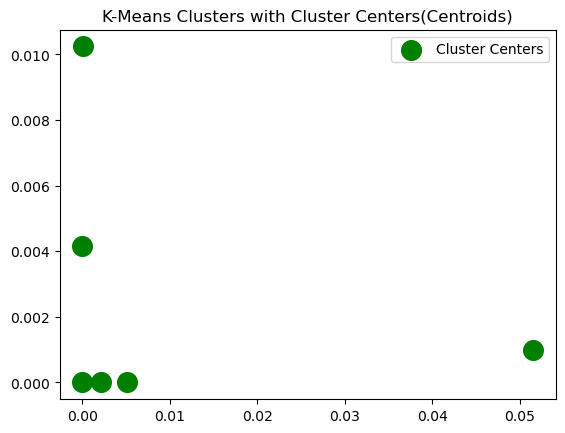

In [29]:
# Plot cluster centers or centroids
centroids = K_Means.cluster_centers_
print("Centroids: ",centroids,"\n \n")

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='green', label='Cluster Centers')
plt.legend()
plt.title("K-Means Clusters with Cluster Centers(Centroids)")
plt.show()

## K-Means  on Principal Components of Genes (X_pca)

Number of Clusters: 6 




C:\Users\smattaparthi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Labels:  [1 1 3 ... 4 1 4] 
 



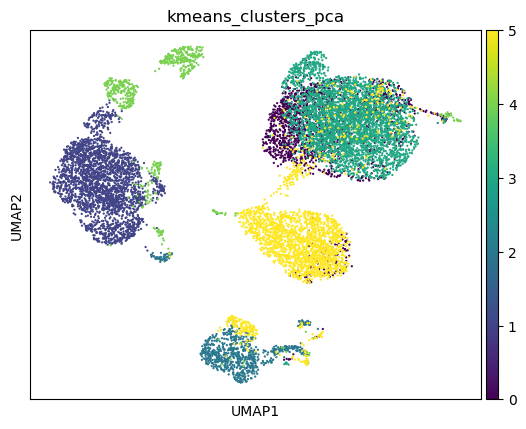

In [30]:
from sklearn.cluster import KMeans

# number of clusters - value of K
clusters_pca = 6

print("Number of Clusters:",clusters_pca, "\n\n")

# Extract first 10 principal components
X_pca = adata.obsm['X_pca'][:, :10]

#Initialize K-Means model 
K_Means_pca = KMeans(n_clusters=clusters_pca)

#train the model
c_labels_pca = K_Means_pca.fit_predict(X_pca)

print("Cluster Labels: ",c_labels_pca,"\n \n")

# Add cluster labels to AnnData object
adata.obs['kmeans_clusters_pca'] = c_labels_pca

# Visualize  clusters using UMAP
sc.pl.umap(adata, color='kmeans_clusters_pca')

## Hierarchical Clustering

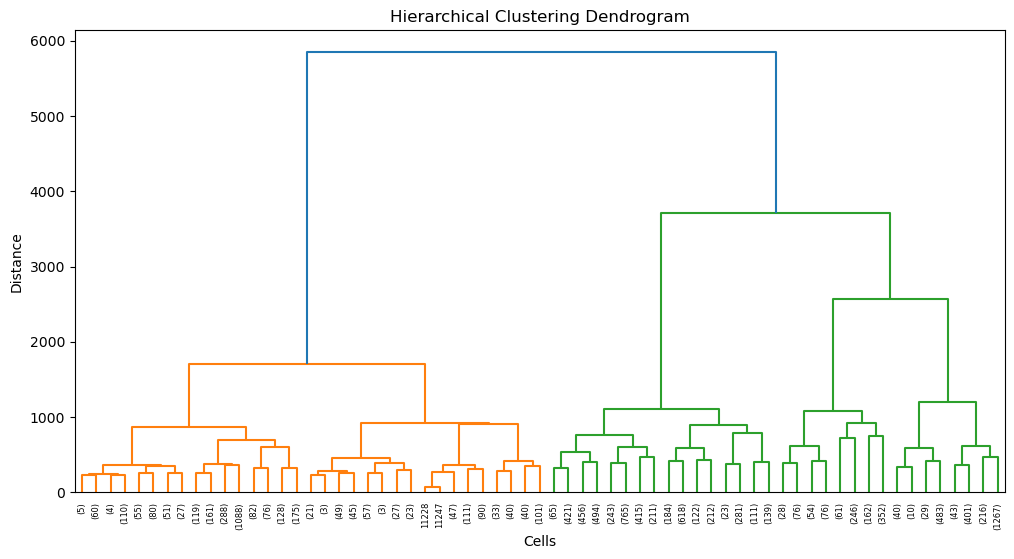

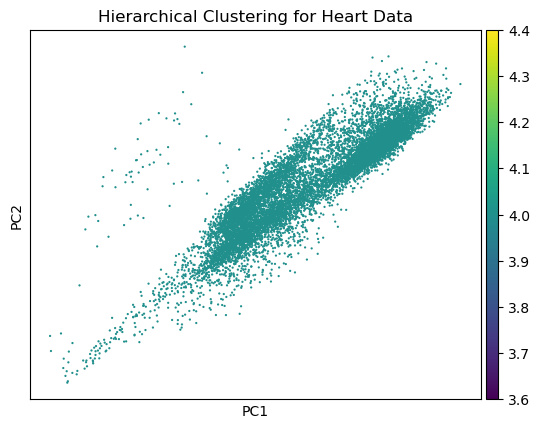

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate linkage matrix after converting csr_matrix to dense matrix
linkage_matrix = linkage(adata.X.toarray(), method='ward') # ward minimizes the variance of distances between clusters

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=5, truncate_mode='level', orientation='top', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cells")
plt.ylabel("Distance")
plt.show()

# Determine number of clusters 
max_dist = 2000  # Set a threshold for the distance to cut the dendrogram
clusters_h = fcluster(linkage_matrix, max_dist, criterion='distance')
num_clusters = len(set(clusters_h))

# Add cluster labels to AnnData object
adata.obs['hierarchical_clusters'] = num_clusters

# Visualize the clusters (for example, using PCA)
sc.pl.pca(adata, color=['hierarchical_clusters'], title="Hierarchical Clustering for Heart Data")

